## Multi-Layer Perception

In [1]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load dataset 
# Select features (X) and target variable (y)
testing_data=pd.read_csv('testing_data.csv')
training_data= pd.read_csv('new1.csv')
# Training data
X_train = training_data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']]  # Features for training
y_train = training_data['aqi']  # Target variable (AQI) for training

# Testing data
X_test = testing_data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']]  # Features for testing
y_test = testing_data['aqi']  # Target variable (AQI) for testing

C:\Users\PMLS\AppData\Local\Temp\ipykernel_14472\1359625343.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  training_data= pd.read_csv('new1.csv')


In [3]:


# Initialize the MLP Regressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', max_iter=100, random_state=42)

# Train the MLP Regressor model
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp_model.predict(X_test)

C:\Users\PMLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
# Calculate regression performance metrics
rmse = (mean_squared_error(y_test, y_pred_mlp))**2
mae = mean_absolute_error(y_test, y_pred_mlp)
r2 = r2_score(y_test, y_pred_mlp)

# Print regression performance metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Root Mean Squared Error (RMSE): 17201.248661137466
Mean Absolute Error (MAE): 2.842912982355713
R-squared (R²): 0.9552295861916599


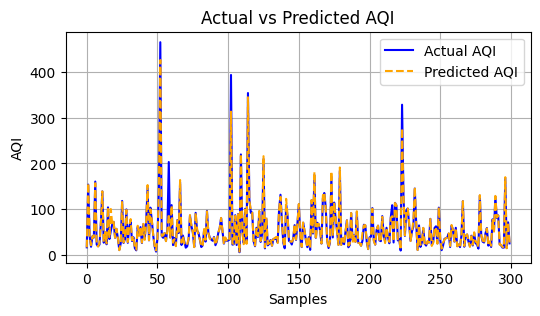

In [5]:

# Plotting Actual vs Predicted AQI for MLP Regressor
plt.figure(figsize=(6, 3))
plt.plot(y_test.values[:300], label='Actual AQI', color='blue')
plt.plot(y_pred_mlp[:300], label='Predicted AQI', linestyle='--', color='orange')
plt.title('Actual vs Predicted AQI')
plt.xlabel('Samples')
plt.ylabel('AQI')
plt.legend()
plt.grid()
plt.show()